In [1]:
#See working directiory
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Machine learning\\height weight prediction'

In [2]:
import pandas as pd
df = pd.read_csv("Height-Weight data.csv")

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape

(3501, 2)

In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Data Visulizattion

In [7]:
import matplotlib.pyplot as plt
import numpy as np

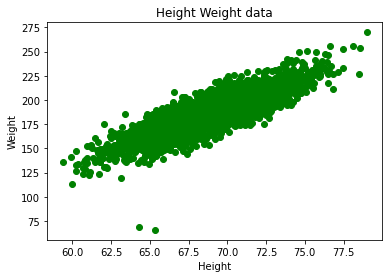

In [8]:
plt.scatter(df['Height'],df['Weight'],color="green")
plt.title('Height Weight data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.savefig('Height weight data')

# Liner regression and prediction

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df[['Height']]
y = df[['Weight']]

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = .70)

In [12]:
xtrain.shape

(2450, 1)

In [13]:
ytrain.shape

(2450, 1)

In [14]:
xtest.shape

(1051, 1)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [18]:
reg.predict([[69]])

array([[186.62584224]])

In [19]:
df['Output'] = reg.predict(x)
df.head()

,Height,Weight,Output
0,73.847017,241.893563,215.217725
1,68.781904,162.310473,185.339324
2,74.110105,212.740856,216.769647
3,71.730978,220.042470,202.735506
4,69.881796,206.349801,191.827434


In [20]:
reg.score(xtest,ytest)

0.7565973150566783

# Best fit line

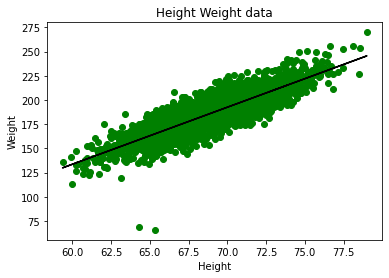

In [21]:
plt.plot(df.Height,df['Output'], color="black")
plt.scatter(df['Height'],df['Weight'],color="green")
plt.title('Height Weight data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.savefig('Best fit line Height weight data')

# Cost function

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
pred = reg.predict(xtest)
pred

array([[220.81195724],
       [196.64218039],
       [171.90119211],
       ...,
       [180.46771968],
       [198.61460119],
       [176.02715957]])

In [24]:
mae = mean_squared_error(ytest,pred)
mae

101.56253236200028

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mae = mean_absolute_error(ytest,pred)
mae

8.194942300524408

# Save model with joblib

In [27]:
import joblib as jb

In [28]:
jb.dump(reg,'Weight prediction model save with joblib')

['Weight prediction model save with joblib']

In [29]:
reg3 = jb.load('Weight prediction model save with joblib')

In [30]:
reg3.predict([[69]])

array([[186.62584224]])